----
# Analysis of the SA optimization
----

We optimized Tree-Tensor Networks (TNNs) using Simulated Annealing (SA).  
Here we visalize and analyze the results.

Date and content of runs:
- `2023-10-05`: small run to test the notebook. No MPI parallelization.
- `TEST`: small test with MPI parallelization (performed on 2023-11-27).
- `2023-11-27`: run for data collection. With MPI parallelization.

Sections:
- <a href=#load>Load the dataframe</a>
- <a href=#next>WIP</a>

----
<a id='top'></a>

In [1]:
# Set working directory to be the main directory of the repo.
import os
#try:
#    was_cwd_initialized
#except NameError:
#    os.chdir('ttn_learning/')
#    was_cwd_initialized = True
print('working directory:', os.getcwd())

import numpy as np              # Import NumPy library
import matplotlib.pyplot as plt # Import graphical library for plots
import pandas as pd
import sys
sys.path.insert(0, 'ttn_demo')
sys.path.insert(0, 'ttn_learning')
import ttn
# For certain runs, there is no way to know the slurm_jobid and slurm_procid if not manually.
from analysis_utils import get_id_of_files

# Name of files and directories
today = 'TEST'
today = '2023-11-27'
data_path = f'ttn_learning/data/{today}_TTN_SA'

working directory: /Users/mthib/Intel/pando-TN


/Users/mthib/anaconda3/lib/python3.11/site-packages/cotengra/hyperoptimizers/hyper.py:34: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


<a id='load'></a>

----
## Load the dataframe and visualize its content

<a href=#top>Back to top</a>

In [2]:
L = 24
site_dim = 2
bond_size = 3
run = 43

slurm_jobid, slurm_procid = get_id_of_files(today, L, site_dim, bond_size, run)
if today == '2023-10-05':
    file_id =  f'TTN_SA_{slurm_jobid}_{slurm_procid}_{run}_L{L}_D{site_dim}'
else:
    file_id =  f'TTN_SA_{slurm_jobid}_{slurm_procid}_{run}_L{L}_D{site_dim}_m{bond_size}'

with open(f'{data_path}/{file_id}_summary.pkl', 'rb') as f:
    df = pd.read_pickle(f)
with open(f'{data_path}/{file_id}_hamiltonian_vals.pkl', 'rb') as f:
    hamvals = pd.read_pickle(f)
print(df)

# get adjacency matrix
adj_matrix = df['state'][0].get_adjacency_matrix()

# print(isinstance(df['state'][1], ttn.TTN))
# print(isinstance(df['state'][2], ttn.TTN))
print(sum([isinstance(df['state'][j], ttn.TTN) for j in range(len(df['state']))]))

                                                  state     energy
0     TTN([\n    Tensor(shape=(2, 2), inds=('p23', '... -15.672545
1                                                  None -15.660965
2                                                  None -15.668069
3                                                  None -15.667615
4                                                  None -15.643883
...                                                 ...        ...
996                                                None -15.654151
997                                                None -15.671595
998                                                None -15.679244
999                                                None -15.682915
1000                                               None -15.674528

[1001 rows x 2 columns]
121


In [7]:
# set the matplotlib parameters
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{bm}')

In [61]:
non_recorded_states_idx = ~df['state'].notna()
recorded_states_idx =  df['state'].notna()

recorded_energies = df['energy'][recorded_states_idx]
recorded_states = df['state'][recorded_states_idx]

# compute the overlaps
finalstateidx = recorded_energies.idxmin()
min_energy = recorded_energies[finalstateidx]
min_state = recorded_states[finalstateidx]

ovps_2 = [(min_state.H @ x)**2 for x in recorded_states]

[0.8284910126410352, 0.8391166242404239, 0.843975900982194, 0.8443485621761191, 0.8444693620132692, 0.844502413763035, 0.8444755124781052, 0.844471273100493, 0.8444696467384186, 0.844603572662974, 0.8445889103144901, 0.8445889099988059, 0.8730207439982716, 0.8665118563766391, 0.8663258397049601, 0.9109655016189901, 0.9954886905837057, 0.9974056899427123, 0.9974742928735296, 0.9978332388614605, 0.9978378949570478, 0.9978394806936635, 0.9978395031072738, 0.9981245360556636, 0.9981244436032055, 0.9981244468908227, 0.9982382833021811, 0.9982382909554013, 0.9982382912640915, 0.9982382914440311, 0.9982382915530319, 0.9984980996551991, 0.9986896048313019, 0.9987395582592016, 0.9987395399620199, 0.9986770349410539, 0.9986860618023735, 0.9986860620784899, 0.9986860620800043, 0.998771257199602, 0.9987625218900309, 0.9987625176522363, 0.9987625176504333, 0.9987217575222936, 0.9987217575223593, 0.9989329718334057, 0.998932978907822, 0.9990638870578495, 0.9990648001372052, 0.9990648006369695, 0.999


Num accepted SA moves: 121/1001 = 12.09 %


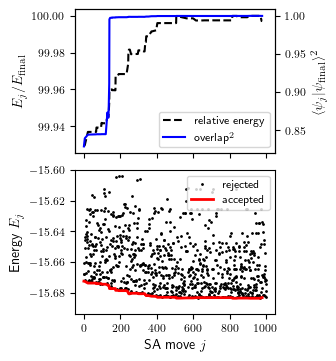

In [91]:
# To focus on the accepted moves, set the variable below:
only_accepted = True




fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3.25, 3.5), constrained_layout =True, sharex=True)
# plt.subplots_adjust(hspace=0.3)
# plt.suptitle(f'{today}:  L={L} , D={site_dim} , m={bond_size} , r={run}',  y=1.06)


# Plot the data with 'o' marker for states where 'state' is None
ax2.plot(df.index[~df['state'].notna()], df['energy'][~df['state'].notna()],
        marker='o', linestyle='', color='k', ms=1,label='rejected')
# Plot the data with 'x' marker for accepted states
ax2.plot(df.index[df['state'].notna()], df['energy'][df['state'].notna()],
        marker='', linestyle='-', linewidth=2, color='red', label='accepted')

ax_ovp = ax1.twinx()

ax1.plot(df.index[df['state'].notna()], df['energy'][df['state'].notna()]/min_energy * 100,
        marker='', linestyle='--', color='k', label='relative energy')
ax_ovp.plot(df.index[df['state'].notna()], ovps_2,
        marker='', linestyle='-', color='b', label=r'overlap$^2$')


ax1.set_ylabel(r'$E_j/E_\textrm{final}$')
ax_ovp.set_ylabel(r'$\langle \psi_j|\psi_\textrm{final}\rangle^2$')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax_ovp.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

ax2.set_xlabel('SA move $j$'); 
ax2.set_ylabel('Energy $E_j$'); 
ax2.legend()

ax2.set_ylim((min_energy - 0.01,-15.6, ))

# Count how many SA moves were accepted/rejected.
num_accepted = len(df.index[df['state'].notna()])
num_rejected = len(df.index[~df['state'].notna()])
print(f'\nNum accepted SA moves: {num_accepted}/{num_accepted+num_rejected} = {num_accepted/(num_accepted+num_rejected)*100:5.2f} %')
# plt.show()

plt.savefig('/Users/mthib/Intel/pando-TN/report/figures/single_TTN_SA_run.pdf')

Generate the Hamiltonian values / TTN state adjacency matrices for learning

In [4]:
L = 24


----
## END
----